In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.rcParams['figure.figsize'] = 18,10

np.set_printoptions(precision=8)
pd.set_option('precision', 8)

## Процедура интегрирования задачи Коши

In [17]:
def real_func(h):
    
    t = np.arange(a,b, h)
    y1 = np.cos(t**2)*np.sqrt(1+t)
    y2 = np.sin(t**2)*np.sqrt(1+t)
    
    return y1, y2, t

def func(x,y):
    
    F = np.zeros(2)
    F[0] = y[0]/(2+2*x)-2*x*y[1]
    F[1] = y[1]/(2+2*x)+2*x*y[0]
    
    return F

In [18]:
def integrate(F, x, y, xStop, h):
    
    def run_kut4(F, x, y, h):
        K1 = F(x,y)
        K2 = F(x + h/3.0, y + h*K1/3.0)
        K3 = F(x + 2*h/3.0, y -h*K1/3+ h*K2)
        K4 = F(x + h, y + h*K1 -h*K2+ h*K3)
        return h*(K1 + 3.0*K2 + 3.0*K3 + K4)/8.0
    
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop-1.0e-9-h:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
        
    return np.array(X),np.array(Y)

In [19]:
a, b =0, 2.01
y_init = np.array([1,0])
step = 0.1

x, y_integrate = integrate(func, a, y_init, b, step)
y1_real, y2_real, t = real_func(step)
y_real = np.vstack((y1_real, y2_real)).transpose()

df = pd.DataFrame(y_integrate, columns=['Integrate y1','Integrate y2'])
df1 = pd.DataFrame(y_real, columns=['Real y1', 'Real y2'])
df = pd.concat([df, df1], axis=1)
df.index = t
df

,Integrate y1,Integrate y2,Real y1,Real y2
0.0,1.00000000,0.00000000,1.00000000,0.00000000
0.1,1.04875620,0.01048775,1.04875641,0.01048791
0.2,1.09456849,0.04380568,1.09456888,0.04380612
0.3,1.13556033,0.10247648,1.13556083,0.10247731
0.4,1.16810252,0.18850647,1.16810307,0.18850784
0.5,1.18666998,0.30300464,1.18667052,0.30300673
0.6,1.18382583,0.44559251,1.18382625,0.44559558
0.7,1.15042118,0.61361666,1.15042130,0.61362108
0.8,1.07612496,0.80121538,1.07612438,0.80122176
0.9,0.95041011,0.99835180,0.95040800,0.99836097


Text(0.5, 1.0, 'Max_error/h**4')

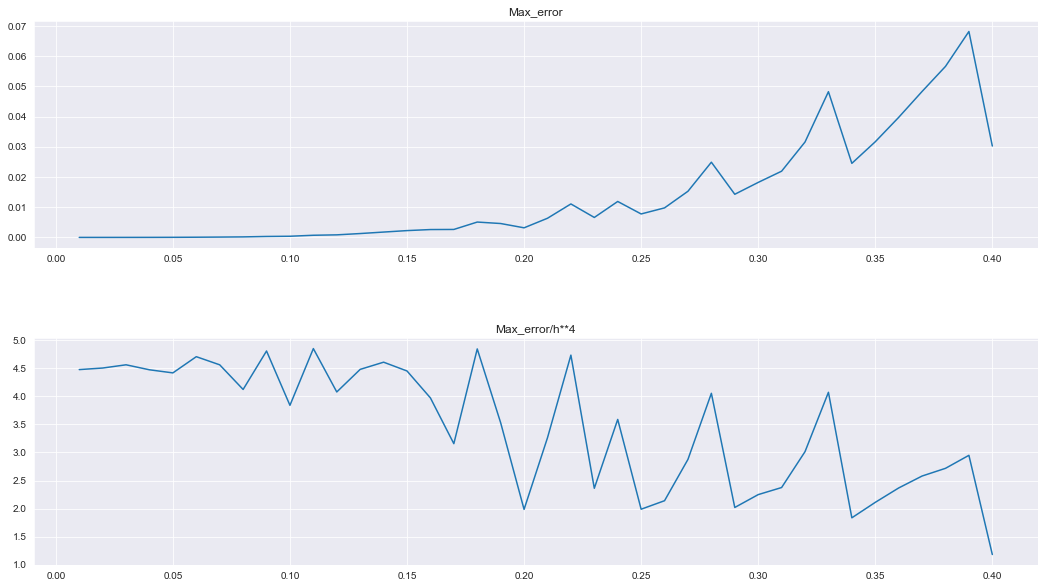

In [21]:
a, b =0, 2
def max_err(y1, y2):
    err = abs(y1-y2)
    return err.max()

h_max =40
e = np.zeros(h_max)
e_h4 = np.zeros(h_max)
for i in range(0, h_max):
    step = np.round(0.01+i*0.01, decimals=2)
    y1_real, y2_real, t = real_func(step)
    y_real = np.vstack((y1_real, y2_real)).transpose()
    t, y_integrate = integrate(func, a, y_init, b, step)
    e[i] = max_err(y_real, y_integrate)
    e_h4[i] = e[i]/step**4
    
h = np.arange(0.01,0.41, 0.01)

fig, ax = plt.subplots(nrows = 2, ncols =1)
plt.subplots_adjust(hspace=0.4)
ax[0].plot(h, e)
ax[0].set_title('Max_error')
ax[1].plot(h, e_h4)
ax[1].set_title('Max_error/h**4')

## Хищник-Жертва

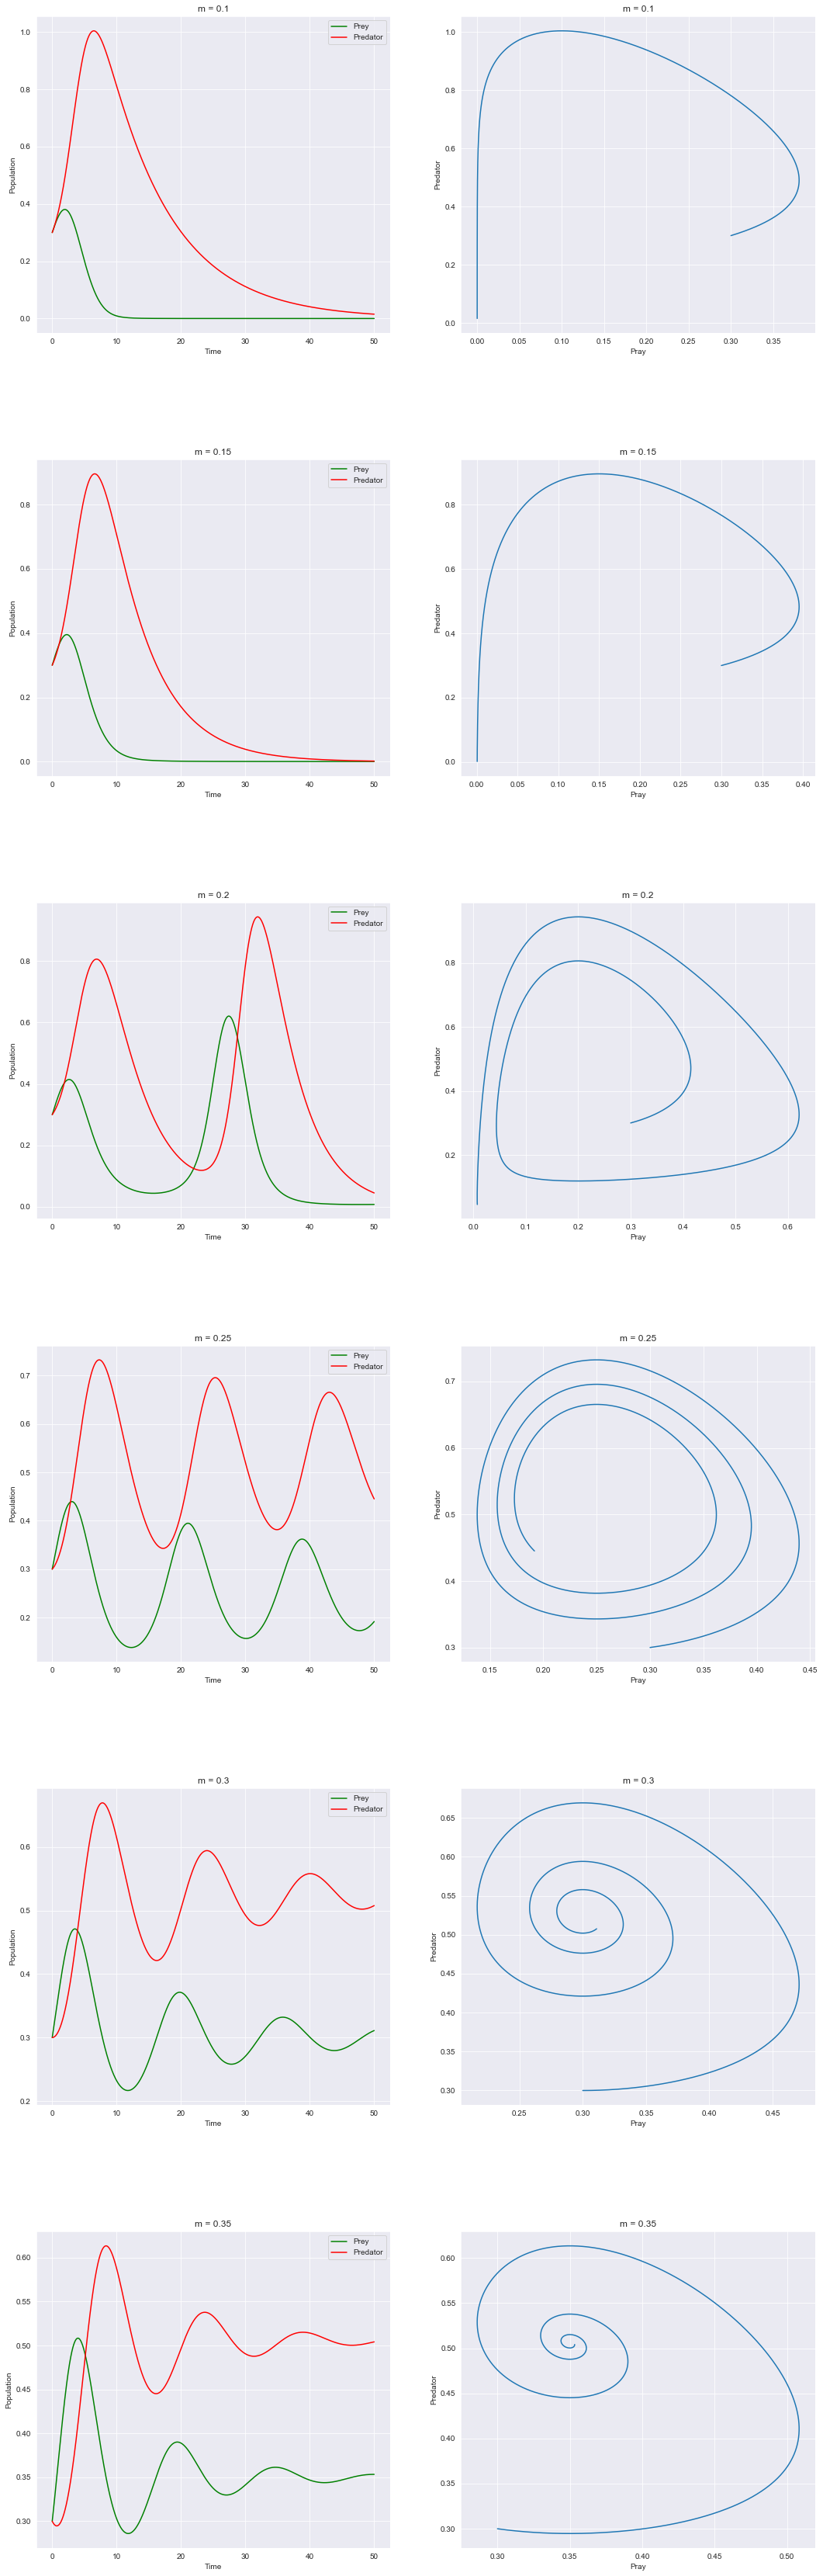

In [54]:
y_init = np.array([0.3, 0.3])
n = 0.1
gamma = 1
a = 0
b = 50
M = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

fig, ax = plt.subplots(nrows = len(M), ncols =2,figsize=(18, 60))
plt.subplots_adjust(hspace=0.4)
i=0
for m in M:
    
    def Predator_prey(x, y):
        F = np.zeros(2)
        F[0] = (1-y[0])*y[0]**2/(n+y[0]) - y[0]*y[1]
        F[1] = gamma*(y[0]-m)*y[1]
        return F

    step = 0.01
    t,  y = integrate(Predator_prey, a, y_init, b, step)                              
    
    ax[i,0].plot(t, y[:, 0],  label = 'Prey', color ='green')
    ax[i,0].plot(t, y[:, 1], label = 'Predator', color = 'red')
    s = 'm = '+str(m)
    ax[i,0].set(xlabel='Time', ylabel='Population', title = s)
    ax[i,0].legend()
    ax[i,1].plot(y[:, 0], y[:, 1])
    ax[i,1].set(xlabel='Pray', ylabel='Predator', title = s)
    i+=1

In [51]:
y[y==0]

array([], dtype=float64)